<a href="https://colab.research.google.com/github/peecee24/PCA-cs-809-prachi/blob/master/pca_prachi_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files 
uploaded =files.upload()

Saving Pollution.csv to Pollution (7).csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Pollution.csv']))

In [ ]:
print("The shape of sample data = ", data.shape)
print(data.head(41))

The shape of sample data =  (41, 8)
                    CITY  SO2  MANUF   POP  TEMP  WIND  PRECIP-IN  PRECIP-DAY
0                Phoenix   10    213   582  70.3   6.0       7.05          36
1            Little Rock   13     91   132  61.0   8.2      48.52         100
2          San Francisco   12    453   716  56.7   8.7      20.66          67
3                 Denver   17    454   515  51.9   9.0      12.95          86
4               Hartford   56    412   158  49.1   9.0      43.37         127
5             Wilmington   36     80    80  54.0   9.0      40.25         114
6             Washington   29    434   757  57.3   9.3      38.89         111
7           Jacksonville   14    136   529  68.4   8.8      54.47         116
8                  Miami   10    207   335  75.5   9.0      59.80         128
9                Atlanta   24    368   497  61.5   9.1      48.34         115
10               Chicago  110   3344  3369  50.6  10.4      34.44         122
11          Indianapolis   2

In [ ]:
f_data = data.drop("CITY",axis=1)
print(f_data.shape)

(41, 7)


In [ ]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(f_data)
print(standardized_data.shape)
sample_data = standardized_data
covar_matrix = np.cov(standardized_data.T)
print(covar_matrix)
print ( "The shape of Covariance matrix = ", covar_matrix.shape)

(41, 7)
[[ 1.025       0.66088794  0.50612407 -0.4444402   0.09705772  0.0556517
   0.37880272]
 [ 0.66088794  1.025       0.97915108 -0.19479322  0.24389551 -0.0332273
   0.13512503]
 [ 0.50612407  0.97915108  1.025      -0.06424509  0.21795984 -0.0267717
   0.04313527]
 [-0.4444402  -0.19479322 -0.06424509  1.025      -0.35848312  0.39590975
  -0.44099817]
 [ 0.09705772  0.24389551  0.21795984 -0.35848312  1.025      -0.01331924
   0.16820823]
 [ 0.0556517  -0.0332273  -0.0267717   0.39590975 -0.01331924  1.025
   0.50849912]
 [ 0.37880272  0.13512503  0.04313527 -0.44099817  0.16820823  0.50849912
   1.025     ]]
The shape of Covariance matrix =  (7, 7)


In [ ]:
corrMatrix = data.corr() #defining correlation matrix
print (corrMatrix)
print ( "The shape of variancecorrelation matrix = ", corrMatrix.shape)

                 SO2     MANUF       POP  ...      WIND  PRECIP-IN  PRECIP-DAY
SO2         1.000000  0.644769  0.493780  ...  0.094690   0.054294    0.369564
MANUF       0.644769  1.000000  0.955269  ...  0.237947  -0.032417    0.131829
POP         0.493780  0.955269  1.000000  ...  0.212644  -0.026119    0.042083
TEMP       -0.433600 -0.190042 -0.062678  ... -0.349740   0.386253   -0.430242
WIND        0.094690  0.237947  0.212644  ...  1.000000  -0.012994    0.164106
PRECIP-IN   0.054294 -0.032417 -0.026119  ... -0.012994   1.000000    0.496097
PRECIP-DAY  0.369564  0.131829  0.042083  ...  0.164106   0.496097    1.000000

[7 rows x 7 columns]
The shape of variancecorrelation matrix =  (7, 7)


In [ ]:
values, vectors = np.linalg.eig(covar_matrix)
print('Eigen values are',values)
print("Shape of Eigen vectors = ", vectors.shape)

Eigen values are [2.79632268 0.0261528  0.10279478 0.35544813 0.91429107 1.55014323
 1.42984731]
Shape of Eigen vectors =  (7, 7)


In [ ]:
(100*((values[0]+values[6] )/ sum(values)))

58.901323902979975

# Percentage of 0th and 6th eigen value is around 58.9% so I am taking its corresponding Eigen vectors


In [ ]:
PC1 =  sample_data.dot(vectors.T[0])
PC2 =  sample_data.dot(vectors.T[6])

print ("Projected data point's shape ", PC1.shape, PC2.shape)

Projected data point's shape  (41,) (41,)


In [ ]:
# Creating a new data frame for ploting 
dataframe = pd.DataFrame({'PC1': PC1,'PC2': PC2})
print(dataframe.head(43))

         PC1       PC2
0  -2.715976  1.058355
1  -1.717745  0.850043
2  -0.938965 -0.183748
3  -0.549861 -1.228596
4   0.460372 -0.589704
5  -0.697076 -0.421329
6  -0.046126  0.354232
7  -1.376014  1.865963
8  -1.715728  2.585263
9  -0.618589  0.988363
10  7.320800  2.263394
11  0.243477 -0.298744
12 -0.470936 -1.659902
13 -0.854646 -1.143120
14 -0.286503  0.375034
15 -1.654899  1.982865
16  0.800713  0.364360
17  1.984921 -0.173157
18  1.298457 -1.778924
19 -0.499232 -0.280950
20  0.778250  0.174497
21 -0.548239 -1.240907
22 -1.816821 -1.206725
23 -0.034285 -1.353106
24  0.827309 -1.853903
25 -0.439862  0.271419
26  2.322557 -0.775040
27 -0.097020 -0.430633
28  3.251064  1.407061
29  1.023394 -0.750786
30  1.437497 -0.872076
31 -0.922257  1.102822
32 -0.957527  0.860214
33 -0.630961  0.998179
34 -0.088804  1.963624
35 -0.898238 -1.516122
36 -0.523640  0.049580
37 -1.013652  0.524751
38  0.526039 -0.644601
39 -1.011927  0.092678
40  0.850679 -1.730626


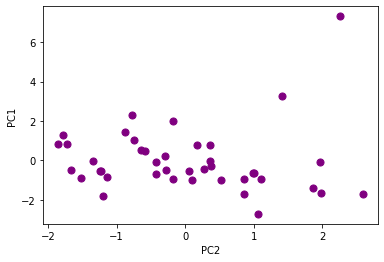

In [ ]:
S = dataframe.plot.scatter(x='PC2',y='PC1',c='PURPLE',s=50)
plt.show()